<a href="https://colab.research.google.com/github/zajcnataliya/Probability-and-Statistics/blob/main/dz9__%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без


In [54]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


In [116]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [56]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [57]:
# подберем коэффициенты для линии регрессии с помощью функции
model = LinearRegression()
regres = model.fit(x, y)
print(regres.intercept_) # выводим интерсепт
print(regres.coef_) # выводим коэффициент

444.1773573243595
[2.62053888]


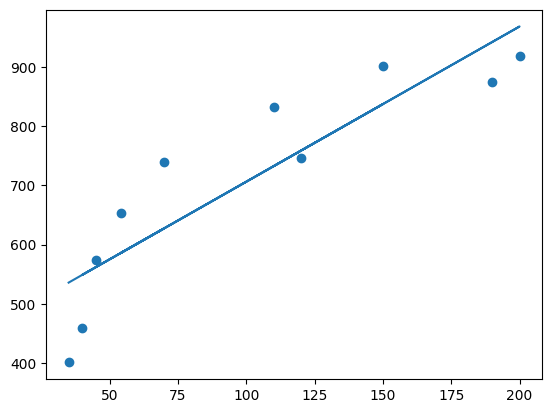

In [59]:
def line (x):
    return 444.117+2.62*x

plt.scatter(x, y)
plt.plot(x, 444.117+2.62*x)

In [41]:
# подберем коэффициенты для линии регрессии математическими формулами с интерсептом
n = 10

In [42]:
b1 = (n*np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - np.sum(x)**2)
b1

2.6205388824027653

In [43]:
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
b1

2.620538882402765

In [45]:
b0 = np.mean(y) - b1 * np.mean(x)
b0

444.1773573243596

In [46]:
y_pred = 444.1773573243596 + 2.620538882402765 * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [65]:
# подберем коэффициенты для линии регрессии матричным методом без интерсепта
x = x.reshape(-1, 1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [66]:
y = y.reshape(-1, 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [67]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
B

array([[5.88982042]])

In [68]:
y_pred = 5.88982042 * x
y_pred

array([[ 206.1437147 ],
       [ 265.0419189 ],
       [1119.0658798 ],
       [1177.964084  ],
       [ 235.5928168 ],
       [ 412.2874294 ],
       [ 318.05030268],
       [ 883.473063  ],
       [ 706.7784504 ],
       [ 647.8802462 ]])

Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [94]:
# градиентный спуск (без ntercept)

def mse_(B1, y=y, x=x, n=10):
  return np.sum((B1*x - y)**2)/n

In [91]:
alpha = 1e-5
B1 = 0.1
n = 10

In [92]:
for i in range(10):
  B1 -= alpha * (2/n) * np.sum((B1*x - y)*x)
  print('B1 = {}'.format(B1))

B1 = 1.6952808000000004
B1 = 2.8510106906144004
B1 = 3.6883000130080337
B1 = 4.294889333823904
B1 = 4.734343885896736
B1 = 5.0527146463278365
B1 = 5.283364074395835
B1 = 5.450462204249402
B1 = 5.571519452188156
B1 = 5.659221554487849


In [95]:
for i in range(3000):
  B1 -= alpha * (2/n) * np.sum((B1*x - y)*x)
  if i % 500 == 0:
    print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse = mse_(B1)))

Iteration = 0, B1 = 5.768789710078065, mse = 56718.66401470576
Iteration = 500, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 1000, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 1500, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 2000, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 2500, B1 = 5.889820420132688, mse = 56516.8584157194


In [96]:
mse_(5.88982042)

56516.85841571943

Задача 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [134]:
# градиентный спуск (c intercept)
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

def mse_(B1, B0, y=y, x=x, n=10):
  return np.sum((B0 + B1*x - y)**2)/n

In [135]:
alpha = 1e-5
B1 = 0.1
B0 = 0.1
n = 10

In [136]:
for i in range(2500000):
  B1 -= alpha * (2/n) * np.sum((B0 + B1*x - y)*x)
  B0 -= alpha * (2/n) * np.sum((B0 + B1*x - y))
  if i % 100000 == 0:
    print('B0 = {B0}, B1 = {B1}, mse = {mse}'.format(B0=B0, B1=B1, mse = mse_(B1, B0)))

B0 = 0.110758381816, B1 = 1.6950780000000003, mse = 298808.8700218417
B0 = 176.81283174262413, B1 = 4.588459999872217, mse = 24603.34326391016
B0 = 283.193870141655, B1 = 3.805448523281312, mse = 13044.313642108338
B0 = 347.2472089095093, B1 = 3.3339876302124964, mse = 8853.71111421085
B0 = 385.8145162892279, B1 = 3.0501151962336612, mse = 7334.452999870819
B0 = 409.03636900034104, B1 = 2.879192093262043, mse = 6783.662223932758
B0 = 423.01853368783054, B1 = 2.776277179263722, mse = 6583.978920618605
B0 = 431.4373679548657, B1 = 2.71431083686087, mse = 6511.585875265579
B0 = 436.5064521775079, B1 = 2.677000135801095, mse = 6485.340551152369
B0 = 439.5586104741486, B1 = 2.6545349012949466, mse = 6475.825589674406
B0 = 441.3963527286912, B1 = 2.641008305785271, mse = 6472.376042184087
B0 = 442.5028800663592, B1 = 2.6328637753539583, mse = 6471.125445645621
B0 = 443.16913386011134, B1 = 2.6279598528628716, mse = 6470.672055249804
B0 = 443.5702935084629, B1 = 2.6250071404873236, mse = 6470